In [26]:
import pandas as pd
import numpy as np

In [27]:
df = pd.read_csv("../Data/properatti.csv")

In [28]:
df.shape

(121220, 26)

In [29]:
df_not_nulls = df.dropna()

In [30]:
df_not_nulls.shape

(598, 26)

In [31]:
df_not_nulls.columns 

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail'],
      dtype='object')

In [12]:
columns_numeric = ['price', 'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor','rooms', 'expenses']
df_not_nulls_numeric = df_not_nulls[columns_numeric]
df_not_nulls_numeric.shape

(598, 10)

In [32]:
df_not_nulls_numeric.head()

,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
96,54000.0,952803.0,54000.0,75.0,30.0,720.000000,1800.000000,3.0,2.0,800.0
691,152000.0,2681964.0,152000.0,52.0,52.0,2923.076923,2923.076923,6.0,2.0,1800.0
692,152000.0,2681964.0,152000.0,52.0,52.0,2923.076923,2923.076923,6.0,3.0,1800.0
693,152000.0,2681964.0,152000.0,52.0,52.0,2923.076923,2923.076923,6.0,3.0,1800.0
694,152000.0,2681964.0,152000.0,52.0,52.0,2923.076923,2923.076923,6.0,2.0,1800.0


## Estandarizo

In [33]:
from sklearn.preprocessing import StandardScaler
# Instanciamos la clase, creando el objeto StdSclr.
StdSclr = StandardScaler()
# este objeto es el que voy a usar para escalar las observaciones nuevas, sin tener que recalcular las medias y desvios:
stdSclr_fit = StdSclr.fit(df_not_nulls_numeric)
df_std = pd.DataFrame(stdSclr_fit.transform(df_not_nulls_numeric), index=df_not_nulls_numeric.index, columns=df_not_nulls_numeric.columns)
df_std.head()

,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
96,-0.799161,-0.842237,-0.842237,0.047107,-0.820785,-2.352406,-0.353928,-0.365146,-0.647132,-0.675107
691,-0.110968,-0.087044,-0.087044,-0.410777,-0.308874,1.079626,0.119919,0.442587,-0.647132,-0.300765
692,-0.110968,-0.087044,-0.087044,-0.410777,-0.308874,1.079626,0.119919,0.442587,0.294437,-0.300765
693,-0.110968,-0.087044,-0.087044,-0.410777,-0.308874,1.079626,0.119919,0.442587,0.294437,-0.300765
694,-0.110968,-0.087044,-0.087044,-0.410777,-0.308874,1.079626,0.119919,0.442587,-0.647132,-0.300765


In [15]:
stdSclr_fit.transform(df_not_nulls_numeric)

array([[-0.79916075, -0.84223737, -0.84223737, ..., -0.36514565,
        -0.64713176, -0.67510698],
       [-0.11096782, -0.08704406, -0.08704406, ...,  0.44258715,
        -0.64713176, -0.30076535],
       [-0.11096782, -0.08704406, -0.08704406, ...,  0.44258715,
         0.29443708, -0.30076535],
       ...,
       [-0.4199524 , -0.42611044, -0.42611044, ...,  0.98107568,
        -1.5887006 ,  2.76883606],
       [ 0.3665538 ,  0.43696763,  0.43696763, ..., -0.09590139,
         1.23600592,  0.28844838],
       [-0.27950487, -0.27198936, -0.27198936, ..., -0.90363418,
         0.29443708, -0.60023866]])

## PCA

In [34]:
from sklearn.decomposition import PCA

# Instanciamos la clase PCA:
pca_properatti = PCA()

# Al no especificar el número de componentes, PCA va a conservar todos los CP.

# Calculamos los componentes principales con el método fit()
pca_properatti_fit = pca_properatti.fit(df_std)


## Contribuciones de cada componenete principal a la varianza total

In [35]:
pca_properatti_fit.explained_variance_ratio_

array([5.96395204e-01, 1.54770441e-01, 1.00510016e-01, 6.94296463e-02,
       4.09622356e-02, 2.07963557e-02, 9.81288870e-03, 5.13979022e-03,
       2.18342267e-03, 9.65425260e-22])

Ver que pca_properatti_fit.transform(df_std) es lo mismo que pca_properatti.fit_transform(df_std)

Uso pca_properatti_fit.transform(df_std) porque ya tengo creado el objeto pca_properatti_fit

In [46]:
df_pca = pd.DataFrame(pca_properatti_fit.transform(df_std), 
                      columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'],\
                      index=df_std.index)
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
96,-2.091953,-1.585076,0.313444,1.256315,0.524013,0.375232,-0.225226,0.497686,0.348047,6.418868e-12
691,-0.479378,1.179372,-0.507598,-0.444916,0.022835,0.146591,0.235550,-0.149847,-0.020671,-1.360562e-11
692,-0.191685,0.902543,-0.409511,-0.446447,-0.739611,-0.204059,0.143258,-0.123500,0.042861,-3.334886e-12
693,-0.191685,0.902543,-0.409511,-0.446447,-0.739611,-0.204059,0.143258,-0.123500,0.042861,-3.334886e-12
694,-0.479378,1.179372,-0.507598,-0.444916,0.022835,0.146591,0.235550,-0.149847,-0.020671,-1.360562e-11


In [37]:
pca_loadings = pd.DataFrame(pca_properatti.components_.T, index=df_std.columns,\
                            columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
# print(pca_properatti.components_)
display(pca_loadings)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
price,0.368395,0.197321,0.234324,0.120062,0.014871,0.321494,-0.512029,-0.561185,0.274491,-9.532522e-11
price_aprox_local_currency,0.399113,0.065127,-0.044154,-0.146385,0.022535,0.255295,-0.156648,0.433573,-0.186766,-7.071068e-01
price_aprox_usd,0.399113,0.065127,-0.044154,-0.146385,0.022535,0.255295,-0.156648,0.433573,-0.186766,7.071068e-01
surface_total_in_m2,0.377354,-0.233357,0.046805,0.120915,0.157858,0.146045,0.547958,0.118165,0.652586,4.009792e-12
surface_covered_in_m2,0.381539,-0.238762,0.033657,0.047676,0.082619,0.071653,0.423785,-0.458864,-0.626023,-1.469055e-11
price_usd_per_m2,0.139678,0.591566,-0.172746,-0.643316,-0.153692,-0.136188,0.297365,-0.205949,0.117615,-3.232567e-12
price_per_m2,0.053441,0.546878,0.620253,0.413128,-0.050682,-0.174506,0.226918,0.201760,-0.132135,-1.526183e-11
floor,0.117585,0.324647,-0.707421,0.583734,-0.187158,0.028170,0.055060,-0.024188,-0.012206,2.077644e-12
rooms,0.305546,-0.294008,0.104174,-0.001626,-0.809761,-0.372410,-0.098019,0.027982,0.067474,1.090811e-11
expenses,0.358028,-0.015970,-0.109624,0.023567,0.500087,-0.742526,-0.237362,0.009531,0.033542,-2.807504e-12


## Biplot

In [44]:
import matplotlib
import matplotlib.pyplot as plt

font = {'family' : 'Verdana',
        'size'   : 22}

matplotlib.rc('font', **font)

def plot_biplot(df_pca, pca_loadings):
    
    fig , ax1 = plt.subplots(figsize=(30,30))
    
    ax1.set_xlim(-5,15)
    ax1.set_ylim(-5,10)

    # Ploteamos a las propiedades en el espacio de los Componentes Principales 1 y 2
    for i in df_pca.index:
        # si viene un color lo uso, sino uso azul: 
        # (uso all porque estoy pidiendo que el array tenga todos los valores no nulos, sirve tambien any)
        if df_pca.color.loc[i].all():
            label = str(i) + "-" + df_pca.places.loc[i]
            ax1.annotate(label, (df_pca.PC1.loc[i], df_pca.PC2.loc[i]), ha='center', color=df_pca.color.loc[i]).set_fontsize(22)
        else:
            ax1.annotate(i, (df_pca.PC1.loc[i], df_pca.PC2.loc[i]), ha='center', color='blue').set_fontsize(22)

    # Ploteamos las líneas de referencia
    ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
    ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

    ax1.set_xlabel('Primer Componente Principal')
    ax1.set_ylabel('Segundo Componente Principal')

    # Creamos ejes secundarios
    ax2 = ax1.twinx().twiny() 

    ax2.set_xlim(-5,15)
    ax2.set_ylim(-5,10)
    ax2.tick_params(axis='y', colors='orange')
    ax2.set_xlabel('Vectores de loadings de los Componentes Principales', color='orange')

    view_scale_factor = 15
    
    # Ploteamos a las variables originales en relación a los Componentes Principales 1 y 2
    for i in pca_loadings[['PC1', 'PC2']].index:
        ax2.annotate(i, (view_scale_factor * pca_loadings.PC1.loc[i], view_scale_factor * pca_loadings.PC2.loc[i]), color='orange')

    # Plot vectors
    ax2.arrow(0,0,view_scale_factor*pca_loadings.PC1[0], view_scale_factor*pca_loadings.PC2[0], transform = ax2.transData)
    ax2.arrow(0,0,view_scale_factor*pca_loadings.PC1[1], view_scale_factor*pca_loadings.PC2[1], transform = ax2.transData)
    ax2.arrow(0,0,view_scale_factor*pca_loadings.PC1[2], view_scale_factor*pca_loadings.PC2[2], transform = ax2.transData)
    ax2.arrow(0,0,view_scale_factor*pca_loadings.PC1[3], view_scale_factor*pca_loadings.PC2[3], transform = ax2.transData);
    ax2.arrow(0,0,view_scale_factor*pca_loadings.PC1[4], view_scale_factor*pca_loadings.PC2[4], transform = ax2.transData);
    ax2.arrow(0,0,view_scale_factor*pca_loadings.PC1[5], view_scale_factor*pca_loadings.PC2[5], transform = ax2.transData);
    ax2.arrow(0,0,view_scale_factor*pca_loadings.PC1[6], view_scale_factor*pca_loadings.PC2[6], transform = ax2.transData);
    ax2.arrow(0,0,view_scale_factor*pca_loadings.PC1[7], view_scale_factor*pca_loadings.PC2[7], transform = ax2.transData);
    ax2.arrow(0,0,view_scale_factor*pca_loadings.PC1[8], view_scale_factor*pca_loadings.PC2[8], transform = ax2.transData);
    ax2.arrow(0,0,view_scale_factor*pca_loadings.PC1[9], view_scale_factor*pca_loadings.PC2[9], transform = ax2.transData);

    

## Armo la paleta de colores

In [51]:
# construyo un diccionario que mapea place name con un color
# import df_pca
df_place_name = df.place_name[df_std.index]
place_name_unique = df_place_name.unique()
# pido un color para cada place_name distinto
#place_name_color = plt.cm.Set1(range(len(place_name_unique)))
#place_name_color = plt.cm.Set3(range(len(place_name_unique)))
#place_name_color = plt.cm.Pastel1(range(len(place_name_unique)))
#place_name_color = plt.cm.Dark2(range(len(place_name_unique)))
#place_name_color = plt.cm.tab10(range(len(place_name_unique)))
place_name_color = plt.cm.tab20c(range(len(place_name_unique)))

#asocio place_name con color
color_for_place_name = dict(zip(place_name_unique, place_name_color))
color_for_place_name

# dada una fila de df_pca devuelve el color con que hay que representarla en el espacio de componentes principales
def get_color(row, df, color_for_place_name):
    #print(row.name)
    place_name = df.loc[row.name, "place_name"]
    result = color_for_place_name[place_name]
    return result
    
# agrego a df_pca el el color que le corresponde al place_name:
colors = df_pca.apply(lambda x: get_color(x, df, color_for_place_name) , axis=1)
#print(colors)
df_pca['color'] = colors


# agrego place_name a df_pca
# x.name es el indice del registro en el dataframe original
places = df_pca.apply(lambda x: df_not_nulls.loc[x.name, "place_name"], axis = 1)
df_pca['places'] = places

In [50]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,color,places
96,-2.091953,-1.585076,0.313444,1.256315,0.524013,0.375232,-0.225226,0.497686,0.348047,6.418868e-12,"[0.19215686274509805, 0.5098039215686274, 0.74...",San Bernardo
691,-0.479378,1.179372,-0.507598,-0.444916,0.022835,0.146591,0.235550,-0.149847,-0.020671,-1.360562e-11,"[0.4196078431372549, 0.6823529411764706, 0.839...",Belgrano
692,-0.191685,0.902543,-0.409511,-0.446447,-0.739611,-0.204059,0.143258,-0.123500,0.042861,-3.334886e-12,"[0.4196078431372549, 0.6823529411764706, 0.839...",Belgrano
693,-0.191685,0.902543,-0.409511,-0.446447,-0.739611,-0.204059,0.143258,-0.123500,0.042861,-3.334886e-12,"[0.4196078431372549, 0.6823529411764706, 0.839...",Belgrano
694,-0.479378,1.179372,-0.507598,-0.444916,0.022835,0.146591,0.235550,-0.149847,-0.020671,-1.360562e-11,"[0.6196078431372549, 0.792156862745098, 0.8823...",Coghlan


## Agrego las referencias de color

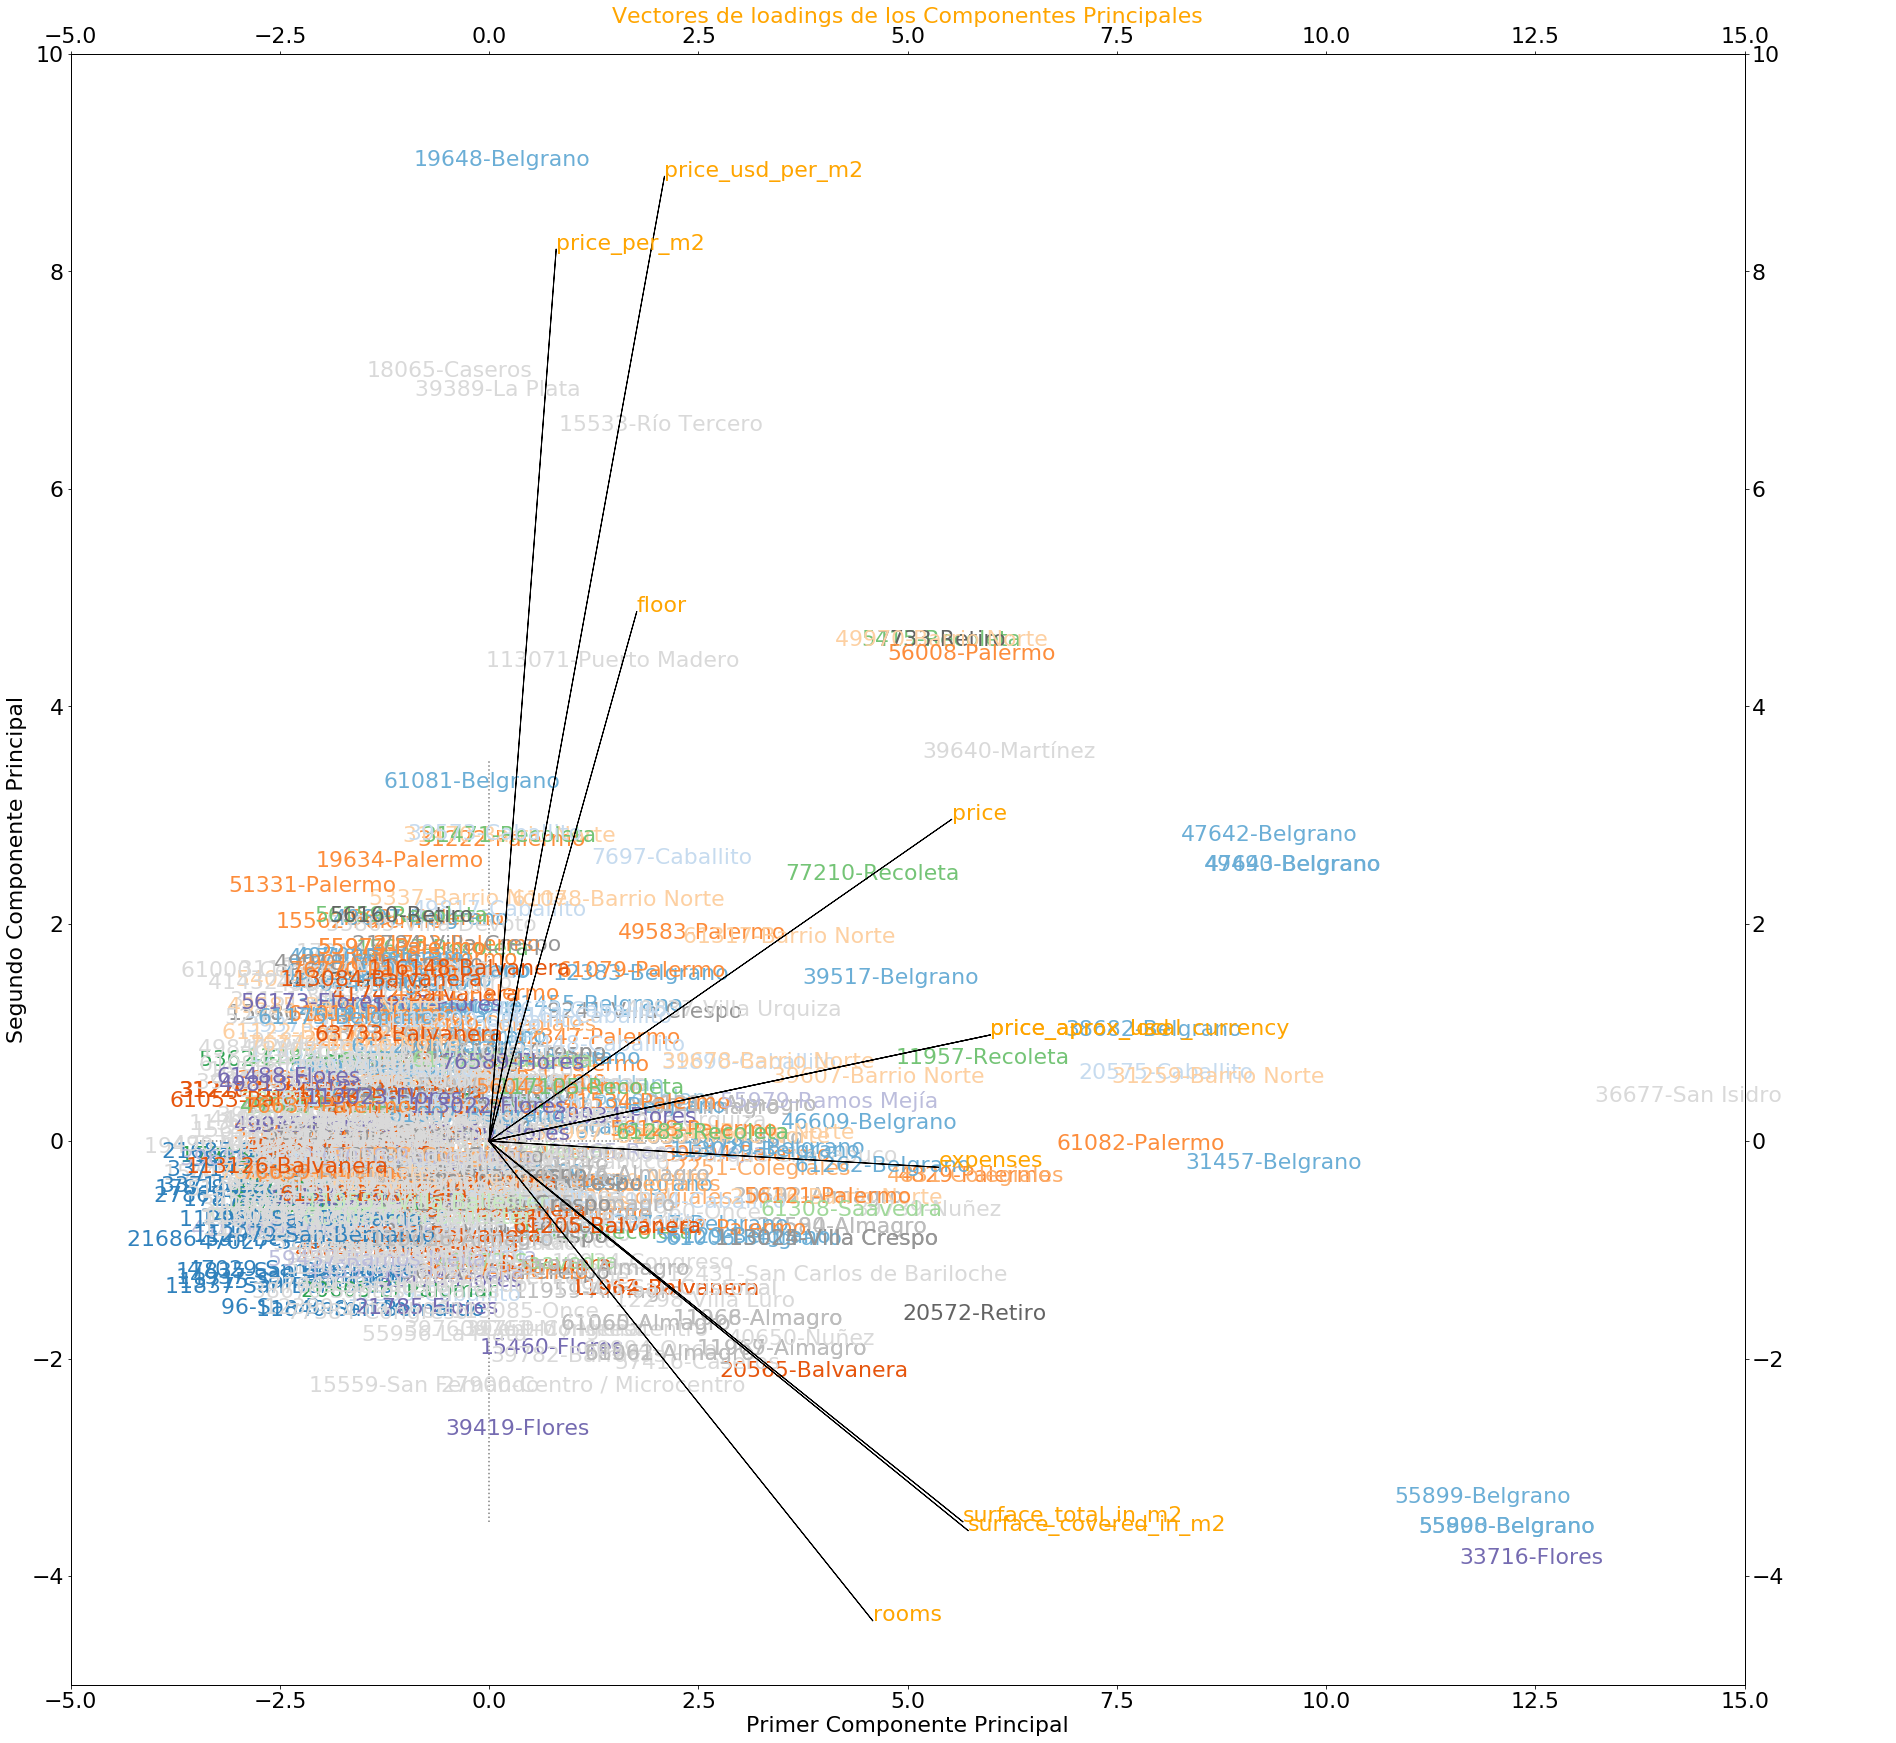

In [52]:
# df_pca tiene las coordenadas de cada registro en el espacio de las componentes principales
# pca_loadings tiene las coordenadas de cada variable original en el espacio de las componentes principales

plot_biplot(df_pca, pca_loadings)


## Miro algunos casos individuales

In [17]:
df.loc[96]
df.loc[61408]

Unnamed: 0                                                                61408
operation                                                                  sell
property_type                                                         apartment
place_name                                                              Rosario
place_with_parent_names                            |Argentina|Santa Fe|Rosario|
country_name                                                          Argentina
state_name                                                             Santa Fe
geonames_id                                                         3.83857e+06
lat-lon                                                 -32.9612386,-60.6390377
lat                                                                    -32.9612
lon                                                                     -60.639
price                                                                 1.288e+06
currency                                

## Dada una observacion nueva (en el subespacio de las variables originales), cómo conozco las coordenadas en el subespacio de las componenetes principales?

In [35]:
obs_nueva = df_not_nulls_numeric.loc[96].copy()
obs_nueva
#tengo que convertirla en un numpy.ndarray de 1 fila:
obs_nueva_fila = obs_nueva.values.reshape(1, -1)
#estandarizo la nueva observacion con el objeto fit creado con todo el df numerico original
obs_nueva_fila_std = stdSclr_fit.transform(obs_nueva_fila)
#print(obs_nueva_fila)
#print(obs_nueva_fila_std)

# entonces las coordenadas de la nueva observacion en el subespacio de las componentes principales es:
# pca_properatti_fit también se calculo al inicio y ahora se reusa para transformar (sin recalcularlo): 
pca_properatti_fit.transform(obs_nueva_fila_std)

array([[-2.09195303e+00, -1.58507597e+00,  3.13444265e-01,
         1.25631464e+00,  5.24013230e-01,  3.75232461e-01,
        -2.25226254e-01,  4.97686468e-01,  3.48047456e-01,
         6.41721128e-12]])